<a href="https://colab.research.google.com/github/SauloHenriqueAguiar/backtestBacktrading/blob/main/fastquant/SMAeRSIEtherHoratraderMay2021aDezembro.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##Backtest usando fastquant

In [1]:
#instalando fastquant
!pip install fastquant

     |████████████████████████████████| 5.3 MB 1.2 MB/s 
     |████████████████████████████████| 156 kB 49.3 MB/s 
     |████████████████████████████████| 1.5 MB 30.4 MB/s 
     |████████████████████████████████| 2.2 MB 23.3 MB/s 
     |████████████████████████████████| 503 kB 46.1 MB/s 
     |████████████████████████████████| 410 kB 53.1 MB/s 
     |████████████████████████████████| 138 kB 49.2 MB/s 
     |████████████████████████████████| 97 kB 6.3 MB/s 
     |████████████████████████████████| 191 kB 36.6 MB/s 
     |████████████████████████████████| 6.3 MB 13.9 MB/s 
     |████████████████████████████████| 843 kB 42.3 MB/s 
     |████████████████████████████████| 271 kB 50.5 MB/s 
     |████████████████████████████████| 3.6 MB 14.2 MB/s 
     |████████████████████████████████| 1.1 MB 38.9 MB/s 
     |████████████████████████████████| 160 kB 47.0 MB/s 
     |████████████████████████████████| 291 kB 52.0 MB/s 
     |████████████████████████████████| 192 kB 52.9 MB/s 
     |███████████

#Pega dados da Binance

In [66]:
# preço do bitcoin
from fastquant import get_crypto_data

crypto = get_crypto_data("BTC/USDT", 
                         "2021-05-15", 
                         "2021-12-10",
                         time_resolution='1h'
                        )

In [67]:
crypto.tail()

,open,high,low,close,volume
dt,,,,,
2021-12-09 20:00:00,47615.89,47724.39,47320.00,47683.61,1874.89405
2021-12-09 21:00:00,47683.61,48141.18,47563.45,47980.29,1698.29772
2021-12-09 22:00:00,47975.50,48468.11,47670.01,47945.20,1374.78005
2021-12-09 23:00:00,47945.20,48258.37,47505.00,47545.59,1110.16209
2021-12-10 00:00:00,47535.90,48788.29,47439.29,48017.68,2449.42072


#Executando Backtesting com conjunto de valores

In [71]:
# Usando Cruzamento de Médias Móveis 
from fastquant import backtest

results = backtest('smac', 
                   crypto, 
                   fast_period=[7,14,21,28], 
                   slow_period=[30,45,60,75],
                   plot=False,
                   verbose=False
                  )

In [72]:
#tabela de resultados
results.head()

,strat_id,init_cash,buy_prop,sell_prop,fractional,slippage,single_position,commission,stop_loss,stop_trail,take_profit,execution_type,channel,symbol,allow_short,short_max,add_cash_amount,add_cash_freq,invest_div,fast_period,slow_period,rtot,ravg,rnorm,rnorm100,len,drawdown,moneydown,max,maxdrawdown,maxdrawdownperiod,sharperatio,pnl,final_value,total,win_rate,won,lost,won_avg,won_avg_prcnt,lost_avg,lost_avg_prcnt,won_max,won_max_prcnt,lost_max,lost_max_prcnt
0,1,100000,1,1,False,0.001,None,0,0,0,0,close,,,False,1.5,0,M,True,7,45,0.067251,0.000320,0.084047,8.404705,1209,11.541275,13954.68,"{'len': 1645, 'drawdown': 16.87300321294917, '...",14.766965,68,None,6956.40,106956.40,84,0.345238,29,55,3259.730000,3.259730,-1592.286727,-1.592287,12470.22,12.47022,-6883.20,-6.88320
1,3,100000,1,1,False,0.001,None,0,0,0,0,close,,,False,1.5,0,M,True,7,75,0.029059,0.000138,0.035486,3.548648,1209,14.792203,17872.03,"{'len': 1629, 'drawdown': 17.7493071698793, 'm...",16.833460,69,None,2948.58,102948.58,47,0.255319,12,35,5705.785833,5.705786,-1872.024286,-1.872024,14938.76,14.93876,-7426.86,-7.42686
2,14,100000,1,1,False,0.001,None,0,0,0,0,close,,,False,1.5,0,M,True,28,60,-0.013964,-0.000066,-0.016617,-1.661748,703,7.542191,8044.32,"{'len': 2139, 'drawdown': 19.951884319610564, ...",18.202212,90,None,-1386.72,98613.28,44,0.386364,17,27,3787.122941,3.787123,-2435.844815,-2.435845,13238.54,13.23854,-6092.30,-6.09230
3,6,100000,1,1,False,0.001,None,0,0,0,0,close,,,False,1.5,0,M,True,14,60,-0.040283,-0.000192,-0.047189,-4.718934,1209,12.734477,14016.64,"{'len': 3524, 'drawdown': 21.57143486752678, '...",21.026983,147,None,-3948.20,96051.80,51,0.352941,18,33,3440.588889,3.440589,-1996.327273,-1.996327,14562.22,14.56222,-5666.44,-5.66644
4,2,100000,1,1,False,0.001,None,0,0,0,0,close,,,False,1.5,0,M,True,7,60,-0.052450,-0.000250,-0.061000,-6.100027,741,9.972589,10511.25,"{'len': 3546, 'drawdown': 19.59821999999996, '...",19.330460,148,None,-5109.83,94890.17,63,0.396825,25,38,2257.050800,2.257051,-1619.371053,-1.619371,14817.62,14.81762,-6986.14,-6.98614


In [73]:
#pega os melhores parâmetros da linha superior(anterior)
fast_best, slow_best = results.iloc[0][["fast_period","slow_period"]]
fast_best, slow_best

(7, 45)

#Roda o Backtest usando os valores ótimos encontrados anteriormente

In [74]:
import matplotlib as pl
pl.style.use("default")
pl.rcParams["figure.figsize"] = (9,5)

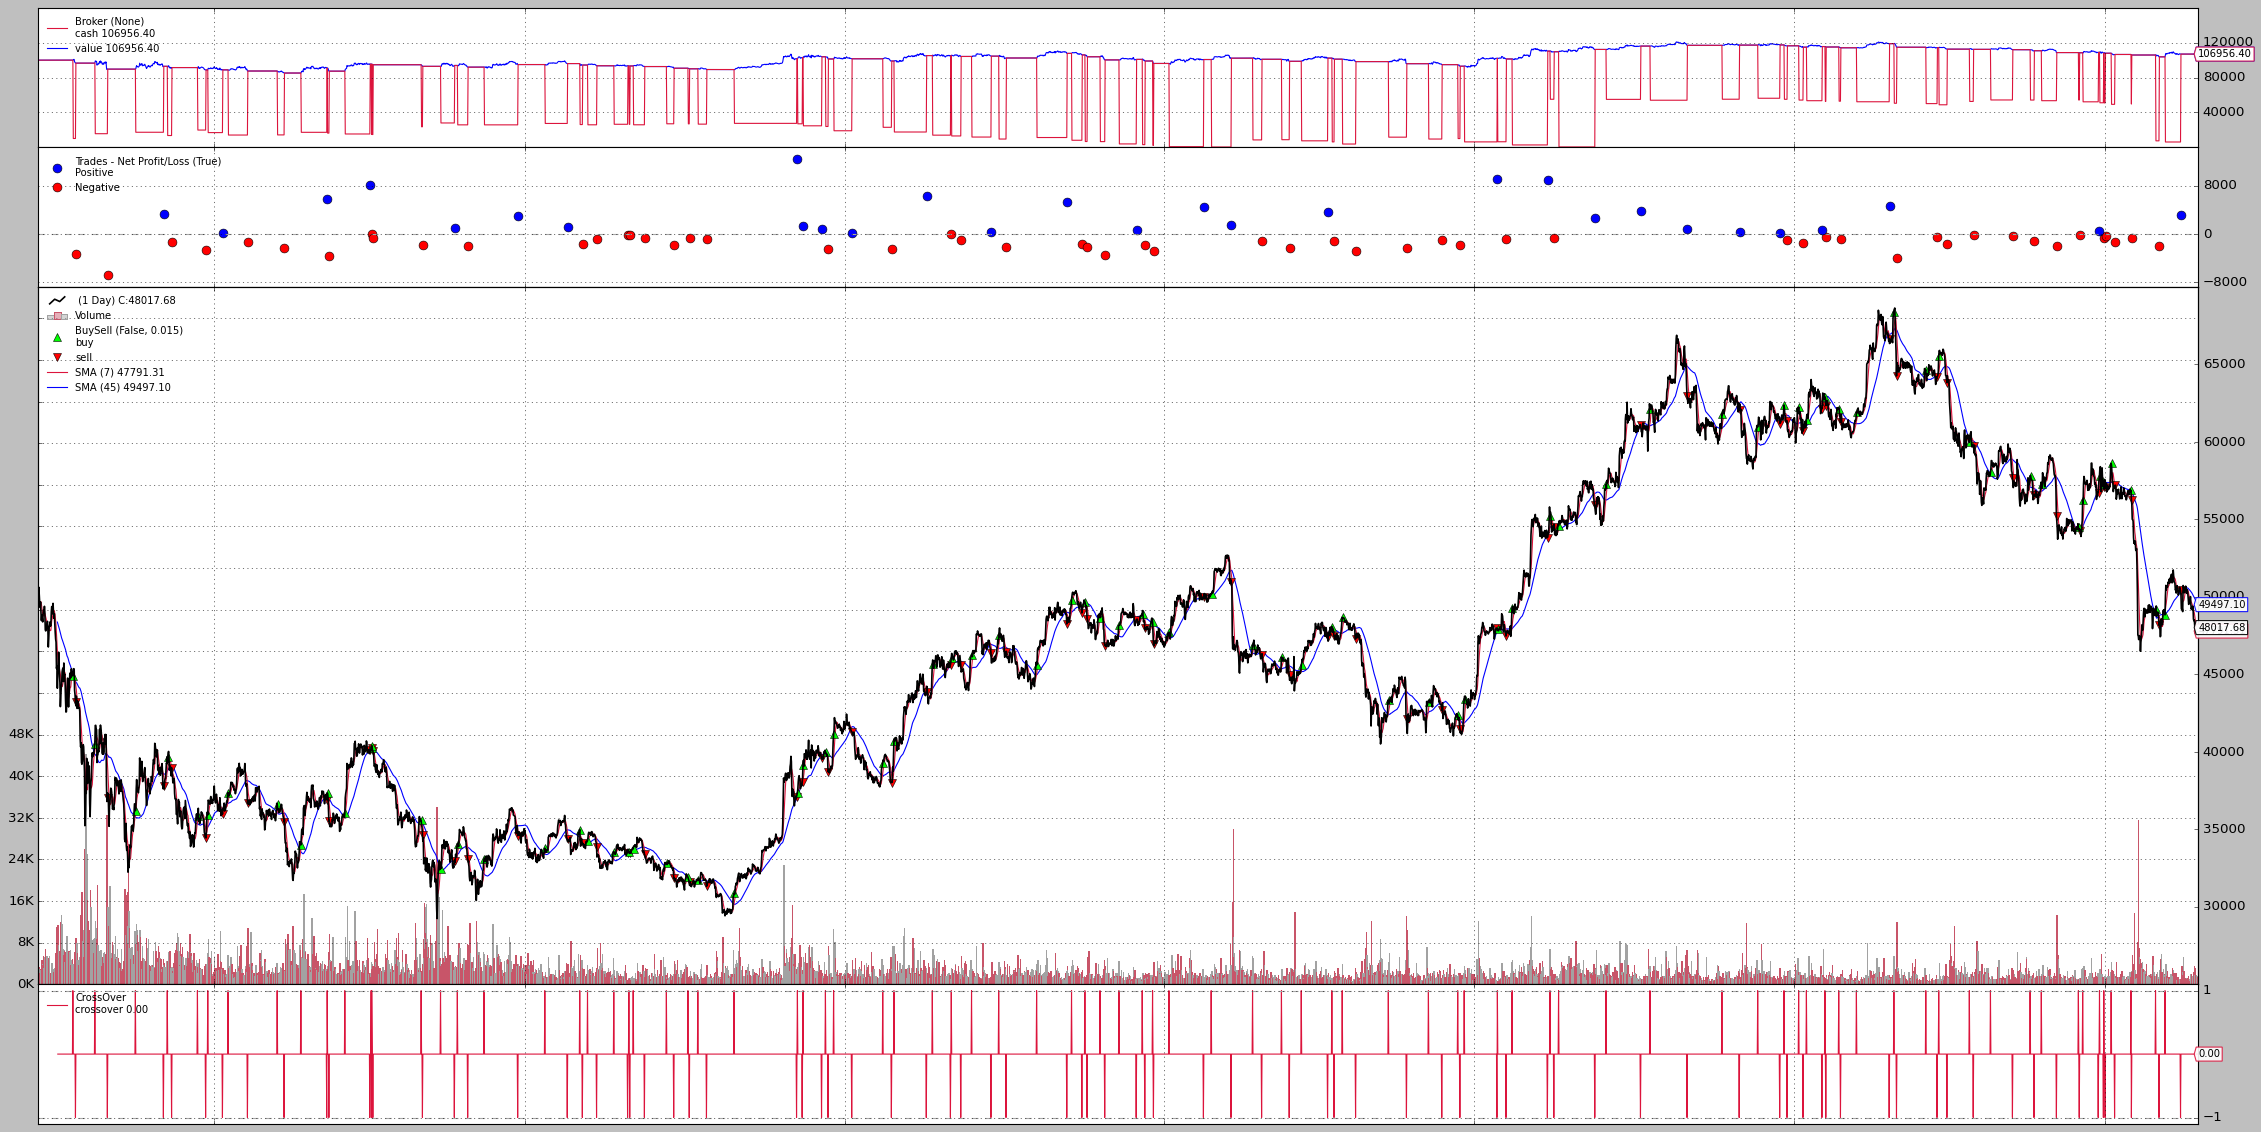

In [75]:
#mostra resultados com novos valores otimizados
results = backtest('smac', 
                   crypto, 
                   fast_period=fast_best, 
                   slow_period=slow_best,
                   plot=True,
                   verbose=False
                  )

#Acessando histórico de transações
Isso é feito definindo return_history = True.

##Estratégia Simples

In [76]:
results, history = backtest('smac', 
                               crypto, 
                               fast_period=fast_best, 
                               slow_period=slow_best,
                               plot=False,
                               verbose=False,
                               return_history=True
                              )

In [77]:
results

,strat_id,init_cash,buy_prop,sell_prop,fractional,slippage,single_position,commission,stop_loss,stop_trail,take_profit,execution_type,channel,symbol,allow_short,short_max,add_cash_amount,add_cash_freq,invest_div,fast_period,slow_period,rtot,ravg,rnorm,rnorm100,len,drawdown,moneydown,max,maxdrawdown,maxdrawdownperiod,sharperatio,pnl,final_value,total,win_rate,won,lost,won_avg,won_avg_prcnt,lost_avg,lost_avg_prcnt,won_max,won_max_prcnt,lost_max,lost_max_prcnt
0,0,100000,1,1,False,0.001,None,0,0,0,0,close,,,False,1.5,0,M,True,7,45,0.067251,0.00032,0.084047,8.404705,1209,11.541275,13954.68,"{'len': 1645, 'drawdown': 16.87300321294917, '...",14.766965,68,None,6956.4,106956.4,84,0.345238,29,55,3259.73,3.25973,-1592.286727,-1.592287,12470.22,12.47022,-6883.2,-6.8832


 melhor ROI é de 6,95%

In [78]:
history.keys()

dict_keys(['orders', 'periodic', 'indicators'])

In [79]:
orders = history['orders']
orders

,strat_id,strat_name,dt,type,price,size,value,commission,pnl
0,0,fast_period7_slow_period45,2021-05-18 09:00:00,buy,44925.19,2,89850.38,0.0,0.00
1,0,fast_period7_slow_period45,2021-05-18 15:00:00,sell,43221.40,-2,89850.38,0.0,-3407.58
2,0,fast_period7_slow_period45,2021-05-20 12:00:00,buy,40475.17,2,80950.34,0.0,0.00
3,0,fast_period7_slow_period45,2021-05-21 17:00:00,sell,37033.57,-2,80950.34,0.0,-6883.20
4,0,fast_period7_slow_period45,2021-05-24 10:00:00,buy,36202.00,2,72404.00,0.0,0.00
...,...,...,...,...,...,...,...,...,...
163,0,fast_period7_slow_period45,2021-12-03 15:00:00,sell,56239.08,-1,56863.20,0.0,-624.12
164,0,fast_period7_slow_period45,2021-12-05 23:00:00,buy,49214.10,2,98428.20,0.0,0.00
165,0,fast_period7_slow_period45,2021-12-06 07:00:00,sell,48168.04,-2,98428.20,0.0,-2092.12
166,0,fast_period7_slow_period45,2021-12-06 21:00:00,buy,48834.10,2,97668.20,0.0,0.00


O valor final dos resultados pode ser calculado a partir da comissão e pnl (lucro e perda = profit e loss) de todas as transações fechadas (compradas e vendidas) no histórico:

In [80]:
r = results.squeeze()
r.final_value

106956.40000000005

In [81]:
r.init_cash + orders.pnl.sum() - orders.commission.sum()

106956.40000000005

# estratégia de sinal único com pesquisa de grade

In [82]:
results, history = backtest('smac', 
                               crypto, 
                               fast_period=[7,14,21], 
                               slow_period=[30,45,60],
                               plot=False,
                               verbose=False,
                               return_history=True
                              )

In [83]:
orders = history['orders']
orders.strat_id.unique(), orders.strat_name.unique()

(array([0, 1, 2, 3, 4, 5, 6, 7, 8]),
 array(['fast_period7_slow_period30', 'fast_period7_slow_period45',
        'fast_period7_slow_period60', 'fast_period14_slow_period30',
        'fast_period14_slow_period45', 'fast_period14_slow_period60',
        'fast_period21_slow_period30', 'fast_period21_slow_period45',
        'fast_period21_slow_period60'], dtype=object))

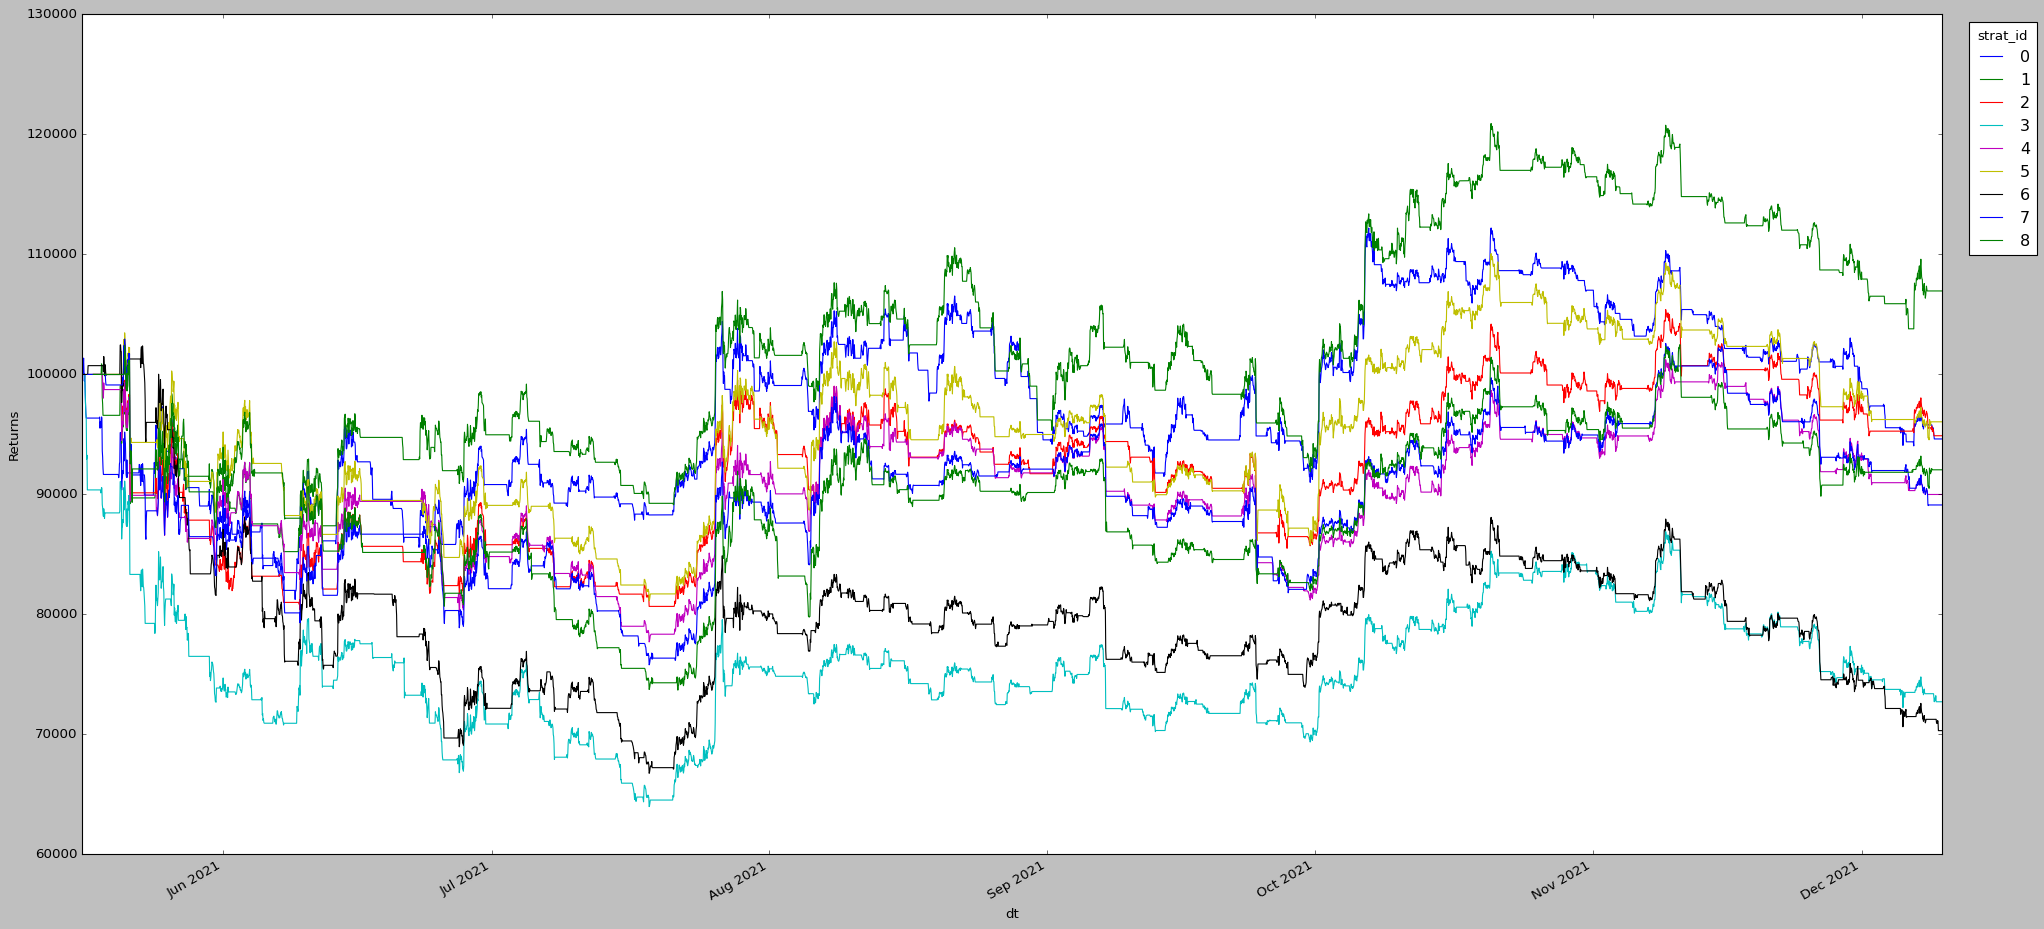

In [85]:
key = 'strat_id'
periodic = history['periodic']
g = periodic.set_index('dt').groupby(key)
axs = g.portfolio_value.plot(legend=key)
axs[0].set_ylabel('Returns')
axs[0].legend(g.groups, title=key, bbox_to_anchor=(1.01, 1), loc='upper left')

# Estratégia multi sinal

In [86]:
# essa estratégia usa varios sinais(Cruzamento de média movel e RSI)
from fastquant import backtest

strats= {
       'smac': {
           'fast_period': 7, 
           'slow_period': 60
            },
        'rsi': {
            'rsi_upper': 70,
            'rsi_lower': 30 
        }
   }
results, history = backtest('multi', 
                               crypto, 
                               strats=strats,
                               plot=False,
                               verbose=False,
                               return_history=True
                              )

2021-12-10T00:00:00, ===Global level arguments===
2021-12-10T00:00:00, init_cash : 100000
2021-12-10T00:00:00, buy_prop : 1
2021-12-10T00:00:00, sell_prop : 1
2021-12-10T00:00:00, commission : 0
2021-12-10T00:00:00, stop_loss : 0
2021-12-10T00:00:00, stop_trail : 0
2021-12-10T00:00:00, take_profit : 0
===Strategy level arguments===
fast_period : 7
slow_period : 60
2021-12-10T00:00:00, ===Global level arguments===
2021-12-10T00:00:00, init_cash : 100000
2021-12-10T00:00:00, buy_prop : 1
2021-12-10T00:00:00, sell_prop : 1
2021-12-10T00:00:00, commission : 0
2021-12-10T00:00:00, stop_loss : 0
2021-12-10T00:00:00, stop_trail : 0
2021-12-10T00:00:00, take_profit : 0
===Strategy level arguments===
rsi_period : 14
rsi_upper : 70
rsi_lower : 30
2021-05-16T18:00:00, BUY CREATE, 45380.56
2021-05-16T18:00:00, Cash: 100000.0
2021-05-16T18:00:00, Price: 45380.56
2021-05-16T18:00:00, Buy prop size: 2.2013853487065806
2021-05-16T18:00:00, Afforded size: 2.2013853487065806
2021-05-16T18:00:00, Final s

In [87]:
results

,strat_id,init_cash,buy_prop,sell_prop,smac.fractional,smac.slippage,smac.single_position,smac.commission,smac.stop_loss,smac.stop_trail,smac.take_profit,execution_type,smac.channel,smac.symbol,smac.allow_short,smac.short_max,smac.add_cash_amount,smac.add_cash_freq,smac.invest_div,smac.fast_period,smac.slow_period,rsi.fractional,rsi.slippage,rsi.single_position,rsi.commission,rsi.stop_loss,rsi.stop_trail,rsi.take_profit,rsi.channel,rsi.symbol,rsi.allow_short,rsi.short_max,rsi.add_cash_amount,rsi.add_cash_freq,rsi.invest_div,rsi.rsi_period,rsi.rsi_upper,rsi.rsi_lower,rtot,ravg,rnorm,rnorm100,len,drawdown,moneydown,max,maxdrawdown,maxdrawdownperiod,sharperatio,pnl,final_value,total,win_rate,won,lost,won_avg,won_avg_prcnt,lost_avg,lost_avg_prcnt,won_max,won_max_prcnt,lost_max,lost_max_prcnt
0,0,100000,1,1,False,0.001,None,0,0,0,0,close,,,False,1.5,0,M,True,7,60,False,0.001,None,0,0,0,0,,,False,1.5,0,M,True,14,70,30,0.052741,0.000251,0.065334,6.53343,960,15.832957,19830.1,"{'len': 2114, 'drawdown': 25.249172689082698, ...",19.402402,84,None,5415.61,105415.61,5,0.8,4,0,60318.4725,60.318472,0.0,0.0,154151.19,154.15119,0.0,0.0


ROI de 5,42%

In [88]:
orders = history['orders']
orders.strat_id.unique(), orders.strat_name.unique()

(array([0]),
 array(['smac.fast_period7_slow_period60', 'rsi.rsi_upper70_rsi_lower30'],
       dtype=object))

In [89]:
from fastquant import backtest

strats= {
       'smac': {
           'fast_period': [7,14], 
           'slow_period': [30,60]
            },
        'rsi': {
            'rsi_upper': [70,80],
            'rsi_lower': [20,30] 
        }
   }
results, history = backtest('multi', 
                               crypto, 
                               strats=strats,
                               plot=False,
                               verbose=False,
                               return_history=True
                              )

A saída de streaming foi truncada nas últimas 5000 linhas.
2021-11-26T08:00:00, Buy prop size: 1.4501507107133895
2021-11-26T08:00:00, Afforded size: 1.4501507107133895
2021-11-26T08:00:00, Final size: 1
2021-11-26T09:00:00, BUY EXECUTED, Price: 55210.90, Cost: 55210.90, Comm: 0.00, Size: 1.00
2021-11-28T06:00:00, SELL CREATE, 54515.61
2021-11-28T07:00:00, SELL EXECUTED, Price: 54475.96, Cost: 55210.90, Comm: 0.00, Size: -1.00
2021-11-28T22:00:00, BUY CREATE, 56029.82
2021-11-28T22:00:00, Cash: 79409.24999999999
2021-11-28T22:00:00, Price: 56029.82
2021-11-28T22:00:00, Buy prop size: 1.4158517746428612
2021-11-28T22:00:00, Afforded size: 1.4158517746428612
2021-11-28T22:00:00, Final size: 1
2021-11-28T23:00:00, BUY EXECUTED, Price: 56029.82, Cost: 56029.82, Comm: 0.00, Size: 1.00
2021-11-28T23:00:00, SELL CREATE, 57765.73
2021-11-29T00:00:00, SELL EXECUTED, Price: 57274.88, Cost: 56029.82, Comm: 0.00, Size: -1.00
2021-11-30T22:00:00, BUY CREATE, 57267.91
2021-11-30T22:00:00, Cash: 8065

In [90]:
orders = history['orders']
orders.strat_id.unique(), orders.strat_name.unique()

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15]),
 array(['smac.fast_period7_slow_period30', 'rsi.rsi_upper70_rsi_lower20',
        'rsi.rsi_upper70_rsi_lower30', 'rsi.rsi_upper80_rsi_lower20',
        'rsi.rsi_upper80_rsi_lower30', 'smac.fast_period7_slow_period60',
        'smac.fast_period14_slow_period30',
        'smac.fast_period14_slow_period60'], dtype=object))

In [91]:
results

,strat_id,init_cash,buy_prop,sell_prop,smac.fractional,smac.slippage,smac.single_position,smac.commission,smac.stop_loss,smac.stop_trail,smac.take_profit,execution_type,smac.channel,smac.symbol,smac.allow_short,smac.short_max,smac.add_cash_amount,smac.add_cash_freq,smac.invest_div,smac.fast_period,smac.slow_period,rsi.fractional,rsi.slippage,rsi.single_position,rsi.commission,rsi.stop_loss,rsi.stop_trail,rsi.take_profit,rsi.channel,rsi.symbol,rsi.allow_short,rsi.short_max,rsi.add_cash_amount,rsi.add_cash_freq,rsi.invest_div,rsi.rsi_period,rsi.rsi_upper,rsi.rsi_lower,rtot,ravg,rnorm,rnorm100,len,drawdown,moneydown,max,maxdrawdown,maxdrawdownperiod,sharperatio,pnl,final_value,total,win_rate,won,lost,won_avg,won_avg_prcnt,lost_avg,lost_avg_prcnt,won_max,won_max_prcnt,lost_max,lost_max_prcnt
0,4,100000,1,1,False,0.001,None,0,0,0,0,close,,,False,1.5,0,M,True,7,60,False,0.001,None,0,0,0,0,,,False,1.5,0,M,True,14,70,20,0.172888,0.000823,0.230555,23.055544,703,15.514040,21828.54,"{'len': 870, 'drawdown': 18.481506709507133, '...",15.018278,40,None,18873.30,118873.30,2,0.500000,1.0,0.0,8742.9600,8.742960,0.0,0.0,8742.96,8.74296,0.0,0.0
1,12,100000,1,1,False,0.001,None,0,0,0,0,close,,,False,1.5,0,M,True,14,60,False,0.001,None,0,0,0,0,,,False,1.5,0,M,True,14,70,20,0.117937,0.000562,0.152029,15.202883,992,15.382307,20454.07,"{'len': 2384, 'drawdown': 21.48742349953272, '...",17.812970,100,None,12517.34,112517.34,2,0.500000,1.0,0.0,8742.9600,8.742960,0.0,0.0,8742.96,8.74296,0.0,0.0
2,6,100000,1,1,False,0.001,None,0,0,0,0,close,,,False,1.5,0,M,True,7,60,False,0.001,None,0,0,0,0,,,False,1.5,0,M,True,14,80,20,0.063879,0.000304,0.079669,7.966869,703,23.053998,31937.60,"{'len': 2363, 'drawdown': 26.06790295140055, '...",22.324826,138,None,6596.29,106596.29,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,5,100000,1,1,False,0.001,None,0,0,0,0,close,,,False,1.5,0,M,True,7,60,False,0.001,None,0,0,0,0,,,False,1.5,0,M,True,14,70,30,0.052741,0.000251,0.065334,6.533430,960,15.832957,19830.10,"{'len': 2114, 'drawdown': 25.249172689082698, ...",19.402402,84,None,5415.61,105415.61,5,0.800000,4.0,0.0,60318.4725,60.318472,0.0,0.0,154151.19,154.15119,0.0,0.0
4,13,100000,1,1,False,0.001,None,0,0,0,0,close,,,False,1.5,0,M,True,14,60,False,0.001,None,0,0,0,0,,,False,1.5,0,M,True,14,70,30,0.025412,0.000121,0.030964,3.096371,992,12.339481,14438.73,"{'len': 1937, 'drawdown': 23.95664017156196, '...",19.402402,80,None,2573.73,102573.73,5,0.800000,4.0,0.0,50248.8775,50.248877,0.0,0.0,104169.25,104.16925,0.0,0.0
5,7,100000,1,1,False,0.001,None,0,0,0,0,close,,,False,1.5,0,M,True,7,60,False,0.001,None,0,0,0,0,,,False,1.5,0,M,True,14,80,30,-0.008563,-0.000041,-0.010223,-1.022270,703,13.372336,15304.95,"{'len': 3415, 'drawdown': 28.279263809833807, ...",24.667917,142,None,-852.62,99147.38,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,3,100000,1,1,False,0.001,None,0,0,0,0,close,,,False,1.5,0,M,True,7,30,False,0.001,None,0,0,0,0,,,False,1.5,0,M,True,14,80,30,-0.014786,-0.000070,-0.017587,-1.758657,1324,22.029171,27838.42,"{'len': 1492, 'drawdown': 25.422378334346597, ...",21.255146,61,None,-1467.71,98532.29,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,2,100000,1,1,False,0.001,None,0,0,0,0,close,,,False,1.5,0,M,True,7,30,False,0.001,None,0,0,0,0,,,False,1.5,0,M,True,14,80,20,-0.019332,-0.000092,-0.022931,-2.293134,1324,22.475132,28435.80,"{'len': 1460, 'drawdown': 25.96218482646024, '...",21.284525,61,None,-1914.63,98085.37,3,0.666667,2.0,0.0,86598.7200,86.598720,0.0,0.0,88288.25,88.28825,0.0,0.0
8,0,100000,1,1,False,0.001,None,0,0,0,0,close,,,False,1.5,0,M,True,7,30,False,0.001,None,0,0,0,0,,,False,1.5,0,M,True,14,70,20,-0.083500,-0.000398,-0.095343,-9.534328,3223,26.618549,33368.34,"{'len': 3223, 'drawdown': 28.213252867978266, ...",25.550931,115,None,-8010.87,91989.13,2,0.500000,1.0,0.0,8742.9600,8.742960,0.0,0.0,8742.96,8.74296,0.0,0.0
9,14,100000,1,1,False,0.001,None,0,0,0,0,close,,,False,1.5,0,M,True,14,60,False,0.001,None,0,0,0,0,,,False,1.5,0,M,True,14,80,20,-0

Melhor ROI foi 18,87%